In [1]:
import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounte

Tenserflow Version:  2.10.1
Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized


In [2]:
df = pd.read_csv(".../dataset/UNSW_NB15_training-set.csv")
x_train, y_train = utils.get_dataset(df)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [22]:
x_test, y_test = utils.get_dataset(df=utils.load_dataset_test())

In [23]:
scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

In [24]:
epochs = 100
batch_size = 64
class_weights = utils.calc_class_weights(y_train)

In [25]:
y_test = utils.label_to_categorical(y_test)
y_train = utils.label_to_categorical(y_train)
y_val = utils.label_to_categorical(y_val)

In [26]:
model = utils.get_model(inshape=x_train.shape[1])

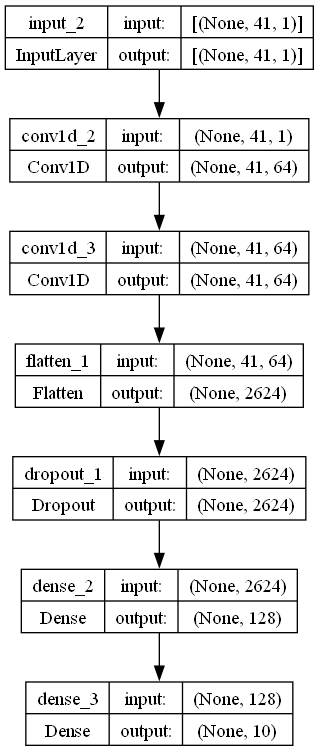

In [27]:
from tensorflow.keras.utils import plot_model

# model = Model(...)

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [28]:
history = model.fit(
    x_train,
    y_train,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    # validation_split = 0.2,
    validation_data=(x_val, y_val),
    class_weight=class_weights,
    workers=3
)

Epoch 1/100
1030/1030 [==============================] - 10s 8ms/step - loss: 1.4353 - acc: 0.6253 - f1_score: 0.3604 - precision_1: 0.8899 - recall_1: 0.5176 - val_loss: 0.9472 - val_acc: 0.6860 - val_f1_score: 0.4209 - val_precision_1: 0.8656 - val_recall_1: 0.6130
Epoch 2/100
1030/1030 [==============================] - 8s 8ms/step - loss: 1.1566 - acc: 0.7127 - f1_score: 0.4212 - precision_1: 0.8690 - recall_1: 0.6333 - val_loss: 0.8509 - val_acc: 0.6709 - val_f1_score: 0.3436 - val_precision_1: 0.7982 - val_recall_1: 0.6307
Epoch 3/100
1030/1030 [==============================] - 8s 8ms/step - loss: 1.0532 - acc: 0.7386 - f1_score: 0.4326 - precision_1: 0.8691 - recall_1: 0.6685 - val_loss: 0.6795 - val_acc: 0.7657 - val_f1_score: 0.4572 - val_precision_1: 0.8622 - val_recall_1: 0.6914
Epoch 4/100
1030/1030 [==============================] - 8s 8ms/step - loss: 0.9937 - acc: 0.7532 - f1_score: 0.4474 - precision_1: 0.8662 - recall_1: 0.6891 - val_loss: 0.6577 - val_acc: 0.7841 - v

KeyboardInterrupt: 

In [ ]:
result, details = utils.get_model_result(model, x_test, y_test, batch_size)

print("Result:", result)
print("Details:", details)